In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train = pd.read_csv('train.csv')

<AxesSubplot:>

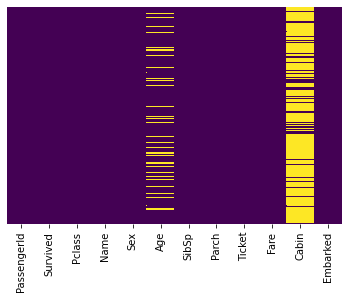

In [34]:
#Data exploration
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
sns.countplot(x = 'Survived', data = train)
sns.countplot(x = 'Survived', hue = 'Sex', data = train)
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)
sns.displot(train['Age'].dropna(), color = 'darkred', bins = 30)
sns.countplot(x = 'SibSp', data = train)
train['Fare'].hist(color = 'green', bins = 40, figsize = (8,4))

In [4]:
#Data cleaning
#Age, there are gaps oon the data. A way of solving is putting the mean age of each class
#sns.boxplot(x='Pclass', y = 'Age', data = train)
def imput_age(cols):
    Age = cols[0]
    Pclass = [1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
train['Age'] = train[['Age', 'Pclass']].apply(imput_age, axis = 1)

In [5]:
#Data cleaning
#Cabin, drop it bacause there are to many gaps
train.drop('Cabin', axis = 1, inplace = True)
#Name and Ticket, drop it bacause are useless information.
train.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [6]:
#Data cleaning
#Sex, is necessary to convert categorical features to dummy variables(numbers)
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)
Train = pd.concat([train, sex, embark], axis = 1)
Train.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [7]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(Train.drop('Survived', axis = 1), Train['Survived'], test_size = 0.40, random_state = 101)  

In [8]:
#Training and Predicting
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_Train, Y_Train)
predictions = logmodel.predict(X_Test)

C:\Users\crism\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
from sklearn.metrics import classification_report

print(classification_report(Y_Test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       207
           1       0.82      0.65      0.72       150

    accuracy                           0.79       357
   macro avg       0.80      0.77      0.78       357
weighted avg       0.79      0.79      0.79       357



In [14]:
from sklearn import metrics
metrics.mean_absolute_error(Y_Test, predictions)

0.21008403361344538

In [17]:
metrics.mean_squared_error(Y_Test, predictions)

0.21008403361344538

In [18]:
np.sqrt(metrics.mean_squared_error(Y_Test, predictions))

0.45834924851410563